<a href="https://colab.research.google.com/github/Oyekanmi/Project_Landmark/blob/main/landmark_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernible landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

In [ ]:
#unzip the folder 
import zipfile
import os

In [ ]:
# #check current directory and change directory to the right locaton
# %pwd
# %cd /content/drive/MyDrive/Udacity_project_landmark_tracking/landmark_project

In [ ]:
# #unzip the landmark images file
# #define path to the zipped images
# path_2_zip_images = "/content/drive/MyDrive/Udacity_project_landmark_tracking/landmark_project/landmark_images.zip"

# #open the zip folder and extract all files :unzip the folder
# with zipfile.ZipFile(path_2_zip_images, "r") as zipref:
#   zipref.extractall()

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [ ]:
# import packages
from PIL import Image
import numpy as np
import torch
import torch.optim as optim
from torchvision import transforms, datasets,models
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
#define the training and testing directory
train_dir = "/Users/oyekanmiolatunde/Desktop/online_courses/udacity/Udacity_Nanodegree/landmark_project/landmark_images/train"
test_dir = "/Users/oyekanmiolatunde/Desktop/online_courses/udacity/Udacity_Nanodegree/landmark_project/landmark_images/test"

#extract 20% of the training dataset for validation
validation_size = 0.2

In [ ]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# TODO: Define transforms for the training data and testing data

#Define the transform for the training dataset
train_transforms = transforms.Compose([
                                       transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(256),
                                       transforms.ToTensor(),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                           std=[0.229, 0.224, 0.225])
                                       ])

#Define the transform for the testing dataset
test_transforms = transforms.Compose([transforms.Resize(280),
                                      transforms.CenterCrop(256),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                           std=[0.229, 0.224, 0.225])

                                      ])

#Load training data
train_dataset = datasets.ImageFolder(train_dir,transform=train_transforms)

#create training and validation from training dataset
#obtain validation indices from the training data
train_count = len(train_dataset)
train_indices = list(range(train_count))
np.random.shuffle(train_indices)
validation_count = int(np.floor(validation_size*train_count))
train_index, validation_index = train_indices[validation_count:], train_indices[:validation_count]

#define samplers for obtaining training and validation batches
sample_train = SubsetRandomSampler(train_index)
sample_validation = SubsetRandomSampler(validation_index)

#create training and validation loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32,
                                           sampler=sample_train)
validation_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32,
                                                sampler=sample_validation)


#load test data
test_dataset = datasets.ImageFolder(test_dir,transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32)


loaders_scratch = {'train': train_loader, 'valid': validation_loader, 'test': test_loader}


In [ ]:
len(train_dataset)

4996

In [ ]:
#get the number of classes
len(train_dataset.classes)

50

**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: To preprocess the data, I did some random rotation by 30 degrees, random resize cropping of 256 x 256 and finally random horizontal flip of the dataset. The reason for random rotation and flipping is due to the nature of the dataset. For example, by inspection of some of the datasets in different classes, I noticed that if these augmentation techniques are not applied (for example in the Soreq Cave image number 463, 358 and so on) , the landmark might be easily misclassified/misinterpreted by the model. For the input tensor, I initially tried 224 x 224 since that is what many architectures accepts as input, however, I decided to increase it to 256 so that the convolution filters will be able to extract a relatively better/richer features.Finally, the dataset is normalized using the mean and standard deviation of the standard ImageNet dataset. However , I am wondering if it is ideal to calculate the mean and startdard deviation for every customized dataset or just normalizing with the coco popular coco mean and standard deviation. Can it affect my result significantly ?

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

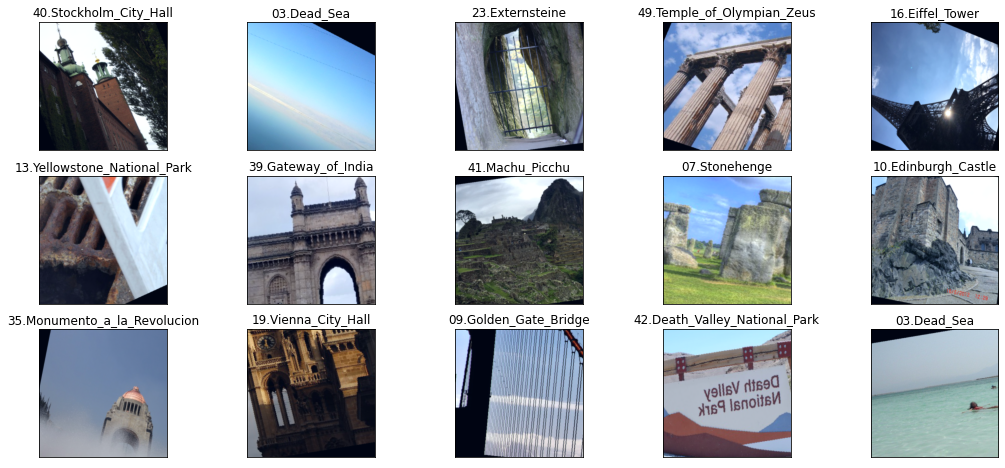

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader

#retrieve one batch of images and their corresponding classes
dataiter = iter(loaders_scratch["train"])
images, labels = dataiter.next()


#convert images to numpy array
images = images.numpy()

fig = plt.figure(figsize=(18,8));

for idx in range(15):
  ax=fig.add_subplot(3,5,idx+1, xticks=[], yticks=[]);

  #I tried to unnormalize the data by multiplying the std and addin the mean 
  plt.imshow(np.transpose(images[idx]*0.229 + 0.485, (1, 2, 0))); #0.229 + 0.485
  ax.set_title(train_dataset.classes[labels[idx]]);

## the class names can be accessed at the `classes` attribute
##of your dataset object (e.g., `train_dataset.classes`)

### Initialize use_cuda variable

In [ ]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [ ]:
import torch.nn as nn
import torch.optim as optim

## TODO: select loss function

#since this is a multiclass problem , I chose crossentropy loss 
criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer

    #using adam optimizer
    return optim.SGD(model.parameters(), lr=0.01)
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

(img_size - kernel + 2* padding)/stride  + 1

In [ ]:
from torch.nn.modules.batchnorm import BatchNorm2d
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()        
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3,16, 3,padding=1)
        self.conv2 = nn.Conv2d(16,32,3,padding=1)
        self.conv3 = nn.Conv2d(32,64,3,padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1 = nn.Linear(32*32*64,1024)
        self.fc2=nn.Linear(1024,256)
        self.fc3=nn.Linear(256,50)
        self.dropout = nn.Dropout(p=0.25)
        
    
    def forward(self, x):
        ## Define forward behavior
        #add sequence of convolution and pooling layer
        x=F.relu(self.conv1(x)) #output: 256 x 256 x 16
        x=self.pool(x)#output: 128 x 128 x 16

        x=F.relu(self.conv2(x))#output: 128 x 128 x 32
        x=self.pool(x)#output: 64 x 64 x 32

        x=F.relu(self.conv3(x))#output: 64 x 64 x 64
        x=self.pool(x)#output: 32 x 32 x 64

        #flatten image input
        x= x.view(-1, 32*32*64)
        #add dropout and fully connected layer
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)   
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  I chose to start with a simple model with three convolution layers. Also, I added a drop out of 25% to regularize the model training after the full connected layers.I then tried adding more layers, for example ,I tried using three consecutive convolution layers at first then batch normalization, relu and pooling as my first set of operations in the model and so on. I thought since this is a fairly high resolution landmark images, I want the first set of features extracted to have a high granularity because that is what feeds into subsequent layers. I also increased the number of filters for the same reason while retaining the input and output image size by leaving my strides as 1 and padding 1.Since the simple model fulfilled my purpose (met the minimum performance expected),I reverted to using the first model with 3 convolution layers.

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [ ]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

            #clear the gradient of optimized variables 
            optimizer.zero_grad()
            #perform forward pass
            forward_output = model(data)
            #calculate loss
            loss = criterion(forward_output,target)
            # perform backward pass
            loss.backward()
            #update paramater: one step
            optimizer.step()

            #record average training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            val_output = model(data)

            #calculate batch loss
            loss = criterion(val_output,target)

            #record average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))
            
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
          
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [ ]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = (1.0/np.sqrt(n))
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)

#-#-# Do NOT modify the code below this line. #-#-#
model_scratch.apply(custom_weight_init)
model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.900300 	Validation Loss: 3.882287
Validation loss decreased (inf --> 3.882287).  Saving model ...
Epoch: 2 	Training Loss: 3.848487 	Validation Loss: 3.823596
Validation loss decreased (3.882287 --> 3.823596).  Saving model ...
Epoch: 3 	Training Loss: 3.786300 	Validation Loss: 3.769282
Validation loss decreased (3.823596 --> 3.769282).  Saving model ...
Epoch: 4 	Training Loss: 3.731747 	Validation Loss: 3.700340
Validation loss decreased (3.769282 --> 3.700340).  Saving model ...
Epoch: 5 	Training Loss: 3.696094 	Validation Loss: 3.661556
Validation loss decreased (3.700340 --> 3.661556).  Saving model ...
Epoch: 6 	Training Loss: 3.671520 	Validation Loss: 3.638265
Validation loss decreased (3.661556 --> 3.638265).  Saving model ...
Epoch: 7 	Training Loss: 3.634194 	Validation Loss: 3.602032
Validation loss decreased (3.638265 --> 3.602032).  Saving model ...
Epoch: 8 	Training Loss: 3.597280 	Validation Loss: 3.581004
Validation loss decreased (3.60203

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [ ]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 50

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.911269 	Validation Loss: 3.912385
Validation loss decreased (inf --> 3.912385).  Saving model ...
Epoch: 2 	Training Loss: 3.904454 	Validation Loss: 3.905258
Validation loss decreased (3.912385 --> 3.905258).  Saving model ...
Epoch: 3 	Training Loss: 3.884077 	Validation Loss: 3.880959
Validation loss decreased (3.905258 --> 3.880959).  Saving model ...
Epoch: 4 	Training Loss: 3.845098 	Validation Loss: 3.835962
Validation loss decreased (3.880959 --> 3.835962).  Saving model ...
Epoch: 5 	Training Loss: 3.810803 	Validation Loss: 3.814545
Validation loss decreased (3.835962 --> 3.814545).  Saving model ...
Epoch: 6 	Training Loss: 3.783415 	Validation Loss: 3.833544
Epoch: 7 	Training Loss: 3.758476 	Validation Loss: 3.783892
Validation loss decreased (3.814545 --> 3.783892).  Saving model ...
Epoch: 8 	Training Loss: 3.751265 	Validation Loss: 3.789184
Epoch: 9 	Training Loss: 3.725138 	Validation Loss: 3.762200
Validation loss decreased (3.783892 --> 3.

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [ ]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# # load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.771193


Test Accuracy: 29% (364/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [ ]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
loaders_transfer = {'train': train_loader, 'valid': validation_loader, 'test': test_loader}


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [ ]:
## TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    return optim.SGD(model.parameters(), lr=0.01)
    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [ ]:
## TODO: Specify model architecture
model_transfer = models.resnet50(pretrained=True)

count = 0
for child in model_transfer.children():
  count+=1
  if count < 7:
    for param in child.parameters():
        param.requires_grad = False

#freeze training for all layers in the feature extractor
# for param in model_transfer.parameters():
#   param.requires_grad=False

#add classifider
input_size = model_transfer.fc.in_features
model_transfer.fc= nn.Linear(input_size,50)

#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  I decided to try a resnet model because it has shown superior performance over the years, due to its skip connection techniques. To keep things simple, I chose the resnet50 model although smaller models like resnet18 might also achieve the minimum performance required. After training the model, I got a performance that is above the threshold required, but I thought I could go a little further by training 30% of the paramters and freezing just 70%. I though this could give a signficiant improvement since since I am not sure some landmark images are included in the ImageNet dataset which the initial weights was learnt from. I thought this could provide extra features and information for the later layers of the model to learn from. Hence, I decided to freeze only the first 7 out of the 10 layers in the resnet.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [ ]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'
n_epochs=30
model_transfer=train(n_epochs, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), \
                        criterion_transfer, use_cuda, save_path='model_transfer.pt')


#-#-# Do NOT modify the code below this line. #-#-#
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 3.269586 	Validation Loss: 2.445732
Validation loss decreased (inf --> 2.445732).  Saving model ...
Epoch: 2 	Training Loss: 2.027816 	Validation Loss: 1.653262
Validation loss decreased (2.445732 --> 1.653262).  Saving model ...
Epoch: 3 	Training Loss: 1.485541 	Validation Loss: 1.391424
Validation loss decreased (1.653262 --> 1.391424).  Saving model ...
Epoch: 4 	Training Loss: 1.219048 	Validation Loss: 1.191109
Validation loss decreased (1.391424 --> 1.191109).  Saving model ...
Epoch: 5 	Training Loss: 1.055119 	Validation Loss: 1.136538
Validation loss decreased (1.191109 --> 1.136538).  Saving model ...
Epoch: 6 	Training Loss: 0.925920 	Validation Loss: 1.024545
Validation loss decreased (1.136538 --> 1.024545).  Saving model ...
Epoch: 7 	Training Loss: 0.840491 	Validation Loss: 1.035479
Epoch: 8 	Training Loss: 0.779079 	Validation Loss: 0.966422
Validation loss decreased (1.024545 --> 0.966422).  Saving model ...
Epoch: 9 	Training Loss: 0.696121 

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [ ]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.581973


Test Accuracy: 86% (1083/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [ ]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    #load image from dir and covert to RGB
    image = Image.open(img_path)
    
    #resize the image to the same size as the training and normalize using the same mean and std
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                           std=[0.229, 0.224, 0.225])]
                                    )

    #tranform the image  
    #image_=datasets.ImageFolder(img_path,trasnform)                             
    image= transform(image)
    image.unsqueeze_(0)
  
    #Move to GPU if it exists
    if use_cuda:
        image = image.cuda()

    #change to evaluation mode    
    model_transfer.eval()  

    #create predictions                                 
    output = model_transfer(image)

    #get the top k values 
    values, indices = output.topk(k)
    
    top_k_classes = []
    
    for i in indices[0].tolist():
        top_k_classes.append(train_dataset.classes[i])

    model_transfer.train()
    
    return top_k_classes


### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

In [ ]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    #print image
    plt.imshow(Image.open(img_path))

    #print suggested lanmarks
    print(f"landmarks:{predicted_landmarks}")
    

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output is not better unfortunately. The model did not classify any correctly. However, in the first test image, the model was able to detect Falls which is almost correct except that this is Ithaca Falls.Interestingly , the model suspected that the third image might be a bridge as seen by the top 3 predictions , Sydney_Harbour_Bridge, Petronas_Towers, Brooklyn_Bridge. This is particularly interesting because the model was able to detect the tiny bridge in the image which shows the ability of cnn based models to capture minute features in images. Potential improvement ideas will be :

1. Retrain the full model but starts with the pretrained weights.
2. Increase the training images , increase the number/varieties of differentiated landmarks images
3. Train for more epochs

landmarks:['43.Gullfoss_Falls', '06.Niagara_Falls', '25.Banff_National_Park']


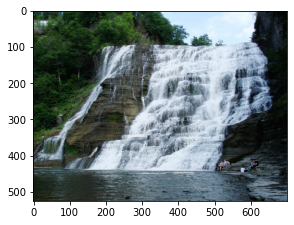

landmarks:['19.Vienna_City_Hall', '16.Eiffel_Tower', '14.Terminal_Tower']


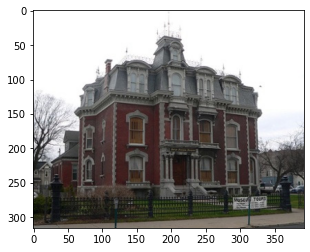

landmarks:['28.Sydney_Harbour_Bridge', '30.Brooklyn_Bridge', '33.Sydney_Opera_House']


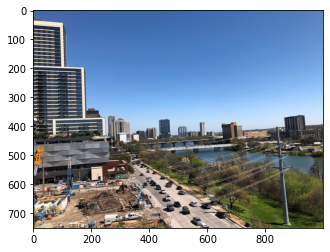

landmarks:['14.Terminal_Tower', '15.Central_Park', '16.Eiffel_Tower']


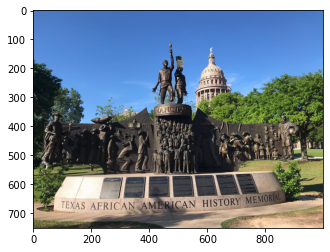

In [ ]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.
img_paths = ["./Ithaca_Falls_Ithaca_New_York.jpeg","./phelps-mansion.jpeg","./photo0jpg.jpeg","./photo1jpg.jpeg"]

fig = plt.figure(figsize=(10,8))
for i in range(4):
  fig.add_subplot(2,2,i+1)
  suggest_locations(img_path=img_paths[i]);
  plt.show()